<a href="https://colab.research.google.com/github/Lizmare/Trabajos_python/blob/main/departament_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Department Store Sales Dataset**

Este conjunto de datos  fue extraido de KAGGLE contiene información sobre las ventas diarias realizadas por vendedores en una tienda departamental, desde 2017 hasta 2022. El propósito principal de este conjunto de datos es proporcionar una base sólida y versátil para aprender a visualizar y manipular datos.

In [ ]:
#Importar las bibliotecas necesarias:
import pandas as pd #importamos la libreria pandas
import matplotlib as mpl #se llama a la libreria matplotlib
import matplotlib.pyplot as plt #se llama a la sub-libreria pyplot d matplotlib
import seaborn as sns #se llama a la libreria seaborn


In [ ]:
#Subimos el dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/portafolio/proyecto 1/department_store_dataset.csv",sep=",",header=0)
df.head()

,Seller,Department,Revenue,Revenue Goal,Margin,Margin Goal,Date,Sales Quantity,Customers
0,Letícia Nascimento,Eletrônicos,6139.41,1857.66,0.14,0.18,2017-01-01,50,213
1,Ana Sousa,Eletrônicos,7044.96,5236.01,0.30,0.17,2017-01-01,52,256
2,Gustavo Martins,Eletrônicos,4109.85,1882.47,0.14,0.20,2017-01-01,33,189
3,Beatriz Santos,Vestuário,315.30,2069.08,0.20,0.17,2017-01-01,2,6
4,Camila Lima,Vestuário,1672.33,3587.07,0.24,0.14,2017-01-01,12,50


# 1° Paso obtener informacion del contenido del dataset

In [ ]:
#informacion detallada del dataset
df.info ()
#Cantidad de tipos de variables que tenemos
df.dtypes.value_counts()
#La cantidad de filas y columnas del dataframe
print(f" Filas: {df.shape[0]}, Columnas:  {df.shape[1]} ")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41629 entries, 0 to 41628
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Seller          41629 non-null  object 
 1   Department      41629 non-null  object 
 2   Revenue         41629 non-null  float64
 3   Revenue Goal    41629 non-null  float64
 4   Margin          41629 non-null  float64
 5   Margin Goal     41629 non-null  float64
 6   Date            41629 non-null  object 
 7   Sales Quantity  41629 non-null  int64  
 8   Customers       41629 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 2.9+ MB
 Filas: 41629, Columnas:  9 


# 2° Paso limpieza de datos

In [ ]:
# Convertimos los datos de la columna de Date al formato de datetime.
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41629 entries, 0 to 41628
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Seller          41629 non-null  object        
 1   Department      41629 non-null  object        
 2   Revenue         41629 non-null  float64       
 3   Revenue Goal    41629 non-null  float64       
 4   Margin          41629 non-null  float64       
 5   Margin Goal     41629 non-null  float64       
 6   Date            41629 non-null  datetime64[ns]
 7   Sales Quantity  41629 non-null  int64         
 8   Customers       41629 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 2.9+ MB


In [ ]:
#Cuantificamos cuantos nulos existe por columna
total = df.isnull().sum().sort_values(ascending=False)
print(total )
#Cuantificamos cuantos nulos existe en todo el data frame
print( 'Total de nulos en todo el dataframe: ',df.isnull().sum().sum())

Seller            0
Department        0
Revenue           0
Revenue Goal      0
Margin            0
Margin Goal       0
Date              0
Sales Quantity    0
Customers         0
dtype: int64
Total de nulos en todo el dataframe:  0


En este dataset no existen valores nulos

In [ ]:
#Limpieza de duplicados
#1 recordamos la cantidad de datos que tenemos
print(df.shape)
#2 procedemos a la eliminacion de duplicados
df.drop_duplicates(inplace=True)
# Verificar si hay duplicados en el DataFrame resultante
df.shape

(41629, 9)


(41629, 9)

No existen duplicados

In [ ]:
# Observamos que tipos de errores de ortografia existe
df.head(2)

,Seller,Department,Revenue,Revenue Goal,Margin,Margin Goal,Date,Sales Quantity,Customers
0,Letícia Nascimento,Eletrônicos,6139.41,1857.66,0.14,0.18,2017-01-01,50,213
1,Ana Sousa,Eletrônicos,7044.96,5236.01,0.30,0.17,2017-01-01,52,256


In [ ]:
#Se observa a simple vista que los datos estan en Portugues e ingles y realizo el cambio a un solo idioma
# Primero quiero saber que tipos de productos tengo
productos = df['Department'].unique()
print(productos)

['Eletrônicos' 'Vestuário' 'Acessórios' 'Casa' 'Brinquedo' 'Esportes'
 'Papelaria']


In [ ]:
#Realizo el reemplazo de los nombres ya que quiero comprender la informacion
df['Department'] = df['Department'].replace('Eletrônicos', 'Electrónicos')
df['Department'] = df['Department'].replace('Acessórios', 'Accesorios')
df['Department'] = df['Department'].replace('Vestuário', 'Vestuario')
df['Department'] = df['Department'].replace('Brinquedo', 'Juguete')
df['Department'] = df['Department'].replace('Esportes', 'Deportes')
df['Department'] = df['Department'].replace('Papelaria', 'Papelería')

In [ ]:
#Revisamos si la informacion fue cambiada
productos = df['Department'].unique()
print(productos)

['Electrónicos' 'Vestuario' 'Accesorios' 'Casa' 'Juguete' 'Deportes'
 'Papelería']


In [ ]:
# Para cambiar los titulos de las columnas el proceso es diferente
# En este caso se crea un diccionario de mapeo de nombres para realizar el cambio
mapeo = {
    'Seller': 'Vendedor',
    'Department': 'Departamento',
    'Revenue': 'Ingresos',
    'Revenue Goal': 'Meta de Ingresos',
    'Margin': 'Margen',
    'Margin Goal': 'Meta de Margen',
    'Date': 'Fecha',
    'Sales Quantity': 'Cantidad de Ventas',
    'Customers': 'Clientes'
}
# Método 'rename' para cambiar los nombres de las columnas
df.rename(columns=mapeo, inplace=True)

In [ ]:
#revisamos si el cambio fue realizado
df.head(5)

,Vendedor,Departamento,Ingresos,Meta de Ingresos,Margen,Meta de Margen,Fecha,Cantidad de Ventas,Clientes
0,Letícia Nascimento,Electrónicos,6139.41,1857.66,0.14,0.18,2017-01-01,50,213
1,Ana Sousa,Electrónicos,7044.96,5236.01,0.30,0.17,2017-01-01,52,256
2,Gustavo Martins,Electrónicos,4109.85,1882.47,0.14,0.20,2017-01-01,33,189
3,Beatriz Santos,Vestuario,315.30,2069.08,0.20,0.17,2017-01-01,2,6
4,Camila Lima,Vestuario,1672.33,3587.07,0.24,0.14,2017-01-01,12,50


Hasta aqui termina la limpieza de datos y posterior a este paso se procede a realizar la extraccion de informacion necesaria

# 3° Realizo distintas consultas

**1. Muestre la cantidad de ventas por vendedor**

In [ ]:
#Agrupacion por venderor y sumatoria de la cantidad de ventas
ventas_por_vendedor = df.groupby('Vendedor')['Cantidad de Ventas'].sum().reset_index().sort_values(by='Cantidad de Ventas', ascending=False)
ventas_por_vendedor

,Vendedor,Cantidad de Ventas
6,Enzo Nascimento,105640
7,Guilherme Santos,105504
2,Camila Carvalho,102409
10,Julia Araújo,97260
13,Lucas Rodrigues,96878
17,Thiago Carvalho,94854
0,Ana Sousa,88372
11,Letícia Nascimento,88274
8,Gustavo Martins,86560
14,Mateus Barbosa,86098


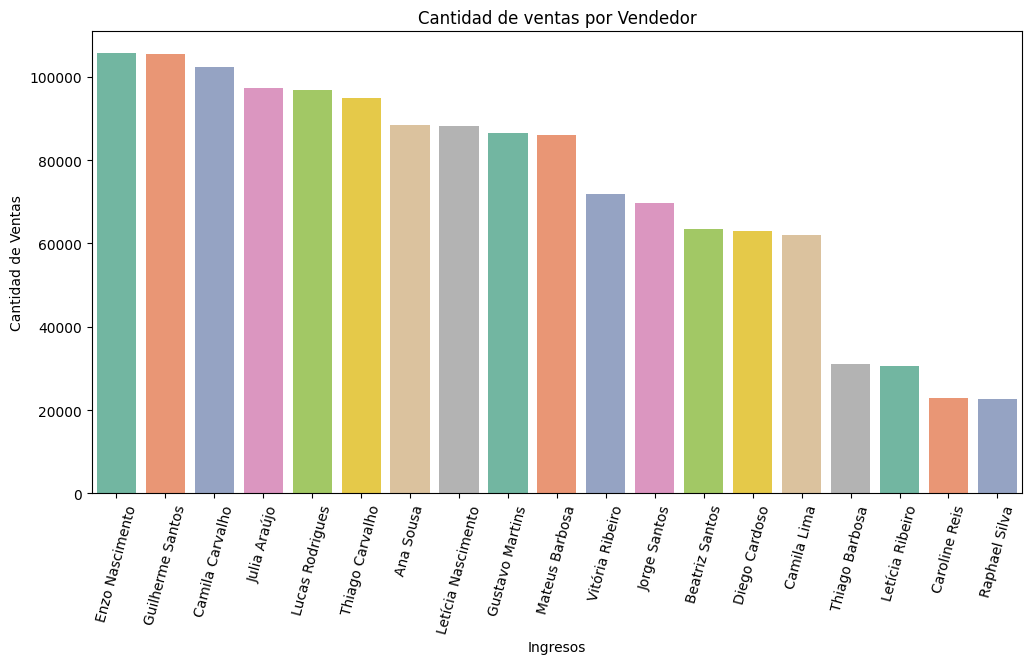

In [ ]:
#Grafica de cantidad de ventas por vendedor
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
colores = sns.color_palette('Set2', len(ventas_por_vendedor))
sns.barplot(x='Vendedor', y='Cantidad de Ventas', data=ventas_por_vendedor, palette=colores)
# Etiquetas para los ejes y el título del gráfico
plt.xlabel('Ingresos')
plt.ylabel('Cantidad de Ventas')
plt.title('Cantidad de ventas por Vendedor')
# Mostrar el gráfico
plt.show()

**2. Muestre los ingresos que obtuvo cada vendedor**

In [ ]:
#Agrupacion por vendedor y sumatoria de ingresos
ingresos_por_vendedor = df.groupby('Vendedor')['Ingresos'].sum().reset_index().sort_values(by='Ingresos', ascending=False)
ingresos_por_vendedor

,Vendedor,Ingresos
7,Guilherme Santos,13200622.46
6,Enzo Nascimento,13110111.17
2,Camila Carvalho,12687168.38
10,Julia Araújo,12279428.19
13,Lucas Rodrigues,12182790.77
17,Thiago Carvalho,11969808.57
0,Ana Sousa,11307408.46
11,Letícia Nascimento,11260849.22
8,Gustavo Martins,11008589.01
14,Mateus Barbosa,11006025.01


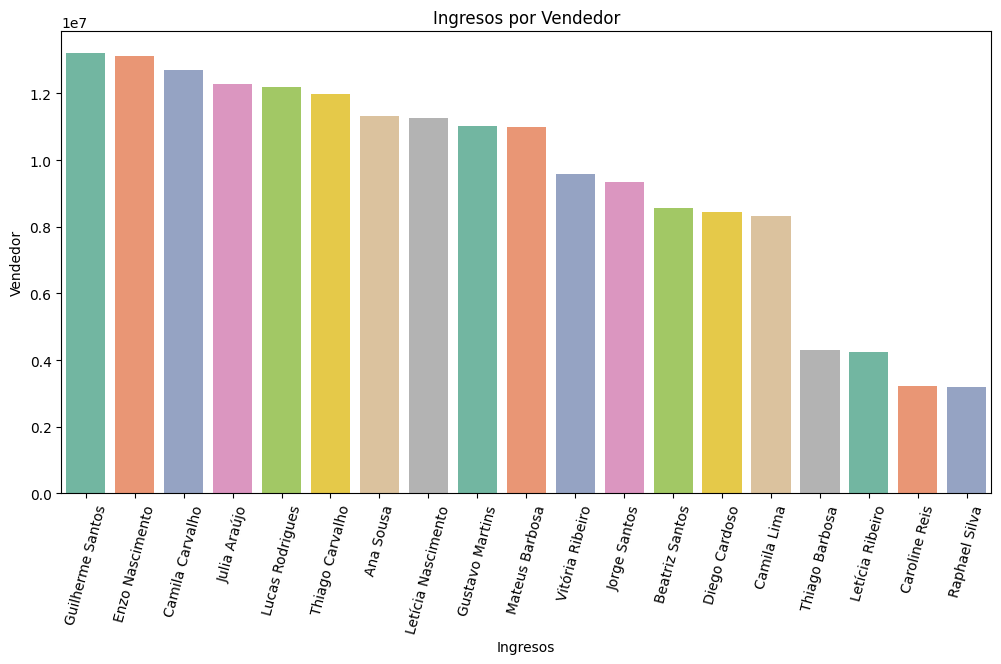

In [ ]:
#Grafica de ingresos por vendedor
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
colores = sns.color_palette('Set2', len(ingresos_por_vendedor))
sns.barplot(x='Vendedor', y='Ingresos', data=ingresos_por_vendedor, palette=colores)
# Etiquetas para los ejes y el título del gráfico
plt.xlabel('Ingresos')
plt.ylabel('Vendedor')
plt.title('Ingresos por Vendedor')
# Mostrar el gráfico
plt.show()

Conclusion:
 Se ve claramente que quien realiza mayor cantidad de ventas es ENZO NASCIMIENTO sin embargo quien tiene mayores ingresos es GUILHERME SANTOS es decir mayor cantidad de ventas no necesariamente significa mayores ingresos

In [ ]:
#Reviso en que departamentos trabajan ambos
enzo_data= df[df['Vendedor'] == 'Enzo Nascimento']
enzo_data

,Vendedor,Departamento,Ingresos,Meta de Ingresos,Margen,Meta de Margen,Fecha,Cantidad de Ventas,Clientes
7,Enzo Nascimento,Casa,9427.77,5667.34,0.37,0.30,2017-01-01,82,186
26,Enzo Nascimento,Casa,3106.37,5892.55,0.14,0.26,2017-01-02,24,99
45,Enzo Nascimento,Casa,8138.61,6088.51,0.44,0.23,2017-01-03,64,305
64,Enzo Nascimento,Casa,999.14,3305.15,0.20,0.32,2017-01-04,9,42
83,Enzo Nascimento,Casa,8773.27,2669.77,0.40,0.32,2017-01-05,74,385
...,...,...,...,...,...,...,...,...,...
41541,Enzo Nascimento,Casa,4337.06,1676.26,0.22,0.31,2022-12-27,52,373
41560,Enzo Nascimento,Casa,2712.10,2131.62,0.30,0.25,2022-12-28,37,313
41579,Enzo Nascimento,Casa,735.31,2310.35,0.12,0.29,2022-12-29,10,94
41598,Enzo Nascimento,Casa,470.08,1925.83,0.44,0.24,2022-12-30,5,18


In [ ]:
ghuilherme_data = df[df['Vendedor'] == 'Guilherme Santos']
print(ghuilherme_data)

               Vendedor Departamento  Ingresos  Meta de Ingresos  Margen  \
8      Guilherme Santos         Casa   6039.19           7901.41    0.23   
27     Guilherme Santos         Casa   5141.02           7784.68    0.40   
46     Guilherme Santos         Casa   4584.69           4068.10    0.40   
65     Guilherme Santos         Casa   9791.05           7333.82    0.23   
84     Guilherme Santos         Casa   2623.10           6954.71    0.26   
...                 ...          ...       ...               ...     ...   
41542  Guilherme Santos         Casa   5239.28           3748.71    0.11   
41561  Guilherme Santos         Casa   2977.68           3142.94    0.41   
41580  Guilherme Santos         Casa   4357.47           2134.59    0.12   
41599  Guilherme Santos         Casa   2712.12            964.12    0.31   
41618  Guilherme Santos         Casa   5197.85           1652.35    0.36   

       Meta de Margen      Fecha  Cantidad de Ventas  Clientes  
8                0.29 

Tanto como Enzo y Guilherme trabajan en el mismo departamento " Casa "

**3. Identifique a los vendedores de cada departamento**

In [ ]:
#Cuantos vendedores hay por departamento
#Primero borro los nombres repetidos
df_unique_vend = df.drop_duplicates(subset=['Vendedor', 'Departamento'])
vendedores_por_departamento = df_unique_vend.groupby('Departamento')['Vendedor'].apply(list).reset_index()
vendedores_por_departamento

,Departamento,Vendedor
0,Accesorios,"[Thiago Barbosa, Letícia Ribeiro]"
1,Casa,"[Enzo Nascimento, Guilherme Santos, Camila Car..."
2,Deportes,"[Julia Araújo, Lucas Rodrigues, Thiago Carvalho]"
3,Electrónicos,"[Letícia Nascimento, Ana Sousa, Gustavo Martin..."
4,Juguete,"[Vitória Ribeiro, Jorge Santos]"
5,Papelería,"[Raphael Silva, Caroline Reis]"
6,Vestuario,"[Beatriz Santos, Camila Lima, Diego Cardoso]"


**4. Muestre los ingresos por departamento**

In [ ]:
#Quiero saber los ingresos por departament
ingresos_por_departamento= df.groupby('Departamento')['Ingresos'].sum().reset_index().sort_values(by='Ingresos', ascending=False)
ingresos_por_departamento

,Departamento,Ingresos
3,Electrónicos,44582871.70
1,Casa,38997902.01
2,Deportes,36432027.53
6,Vestuario,25311061.11
4,Juguete,18915422.00
0,Accesorios,8535634.26
5,Papelería,6418054.98


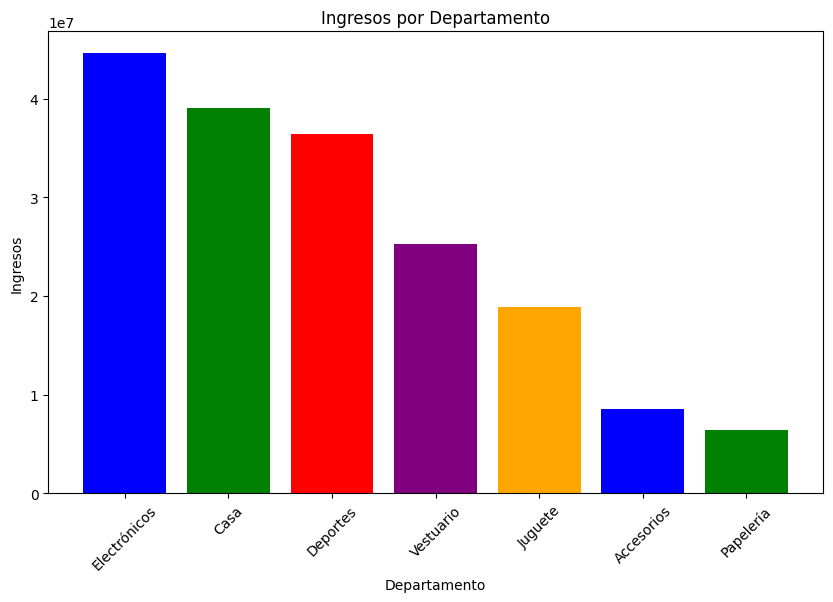

In [ ]:
#Grafica de Ingresos por departamento
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.bar(ingresos_por_departamento['Departamento'], ingresos_por_departamento['Ingresos'], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Ingresos por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Ingresos')
# Mostrar el gráfico
plt.show()

**Conclusion 2:** Si bien los mejores vendedores con mayores ingresos pertenecen al departamento " Casa" no quiere decir que el departamento que mas vende sea ese como se observa en la ultima grafica el departamento con mayores ingresos es de "Electronicos" seguido por el de "Casa" ***¿A que se debe esto?*** La respuesta tambien recae en la cantidad de vendedores que tiene cada departamento,en "Casa" se cuenta con 3 vendedores: Enzo Nascimento, Guilherme Santos, Camila Carvalho mientras que en "Electronicos" se encuentran  4 Vendedores: Letícia Nascimento, Ana Sousa, Gustavo Martins, Mateus Barbosa que si bien no son de los mejores, estan en un punto medio y con la sumatoria de sus ingresos por ventas todos ellos hacen que la el departamento de "Electronicos" tenga los mejores ingresos

**5.Resumen de estadistica descriptiva**

In [ ]:
 # Descripción estadística de Margen
 res_margen=df['Margen'].describe().to_frame()
 res_margen

,Margen
count,41629.000000
mean,0.279164
std,0.150589
min,0.028000
25%,0.170000
50%,0.250000
75%,0.350000
max,0.800000


6. **Muestre en una grafica de torta el porcentaje de Mujeres y Varones que trabajan de la tienda departamental**

In [ ]:
#Consulto los nombres de vendedores
vendedores = df['Vendedor'].unique()
nombres_seller = pd.DataFrame({'Nombre_ Vendedor': vendedores})
print(nombres_seller)
#Quiero saber la cantidad de vendedores
print('La cantidad de vendedores de la empresa es: ',vendedores.shape[0])

      Nombre_ Vendedor
0   Letícia Nascimento
1            Ana Sousa
2      Gustavo Martins
3       Beatriz Santos
4          Camila Lima
5       Thiago Barbosa
6      Letícia Ribeiro
7      Enzo Nascimento
8     Guilherme Santos
9      Vitória Ribeiro
10        Julia Araújo
11     Lucas Rodrigues
12     Thiago Carvalho
13      Mateus Barbosa
14     Camila Carvalho
15       Diego Cardoso
16        Jorge Santos
17       Raphael Silva
18       Caroline Reis
La cantidad de vendedores de la empresa es:  19


In [ ]:
genero = ['F','F','M','F','F','M','F','M','M','F','F','M','M','M','F','M','M','M','F']
nombres_seller['Genero']=genero
print(nombres_seller)

      Nombre_ Vendedor Genero
0   Letícia Nascimento      F
1            Ana Sousa      F
2      Gustavo Martins      M
3       Beatriz Santos      F
4          Camila Lima      F
5       Thiago Barbosa      M
6      Letícia Ribeiro      F
7      Enzo Nascimento      M
8     Guilherme Santos      M
9      Vitória Ribeiro      F
10        Julia Araújo      F
11     Lucas Rodrigues      M
12     Thiago Carvalho      M
13      Mateus Barbosa      M
14     Camila Carvalho      F
15       Diego Cardoso      M
16        Jorge Santos      M
17       Raphael Silva      M
18       Caroline Reis      F


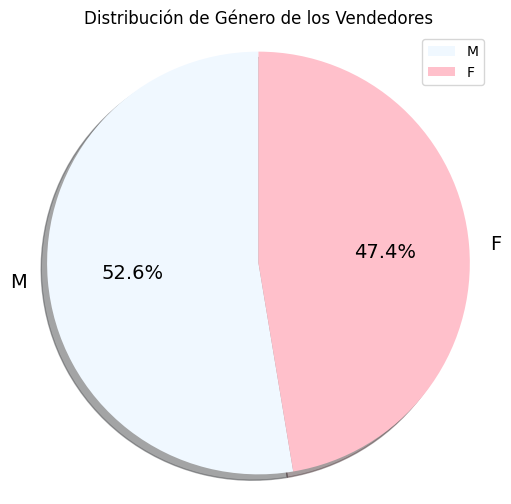

In [ ]:
# Calcular el número de vendedores de cada género
genero_c = nombres_seller['Genero'].value_counts()
# Grafica de un grafica de torta
plt.figure(figsize=(6, 6))
plt.pie(genero_c, labels=genero_c.index,startangle=90, autopct='%1.1f%%',textprops={'fontsize': 14},colors=['AliceBlue','pink'],shadow=True)
plt.axis('equal')  # Especifica que la grafica sea un círculo.
plt.title('Distribución de Género de los Vendedores')
plt.legend()
plt.show()

7. **Realiza una comparativa de la Meta de ingresos vs los Ingresos que se obtuvieron por años**

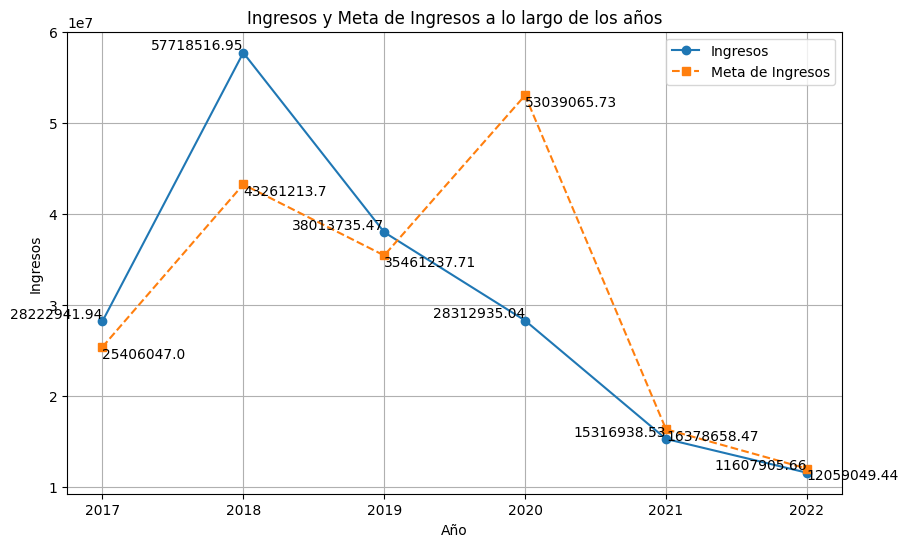

In [ ]:
#Agrupacion de fecha por años y sumatoria de Ingresos y Meta de Ingresos
ingresos_anuales = df.groupby(df['Fecha'].dt.year)['Ingresos'].sum()
meta_ingresos_anuales=df.groupby(df['Fecha'].dt.year)['Meta de Ingresos'].sum()
plt.figure(figsize=(10, 6))
# Gráfica de los ingresos
plt.plot(ingresos_anuales.index, ingresos_anuales.values, marker='o', linestyle='-', label='Ingresos')
# gráfica de línea para la meta de ingresos
plt.plot(meta_ingresos_anuales.index, meta_ingresos_anuales.values, marker='s', linestyle='--', label='Meta de Ingresos')
# Etiqueta los ejes y el título
plt.xlabel('Año')
plt.ylabel('Ingresos')
plt.title('Ingresos y Meta de Ingresos a lo largo de los años')
# Agrega etiquetas de valor en los máximos de ingresos y metas anuales
for i, valor in enumerate(ingresos_anuales.values):
    plt.text(ingresos_anuales.index[i], valor, str(valor), ha='right', va='bottom',fontsize=10)
for i, valor in enumerate(meta_ingresos_anuales.values):
    plt.text(meta_ingresos_anuales.index[i], valor, str(valor), ha='left', va='top',fontsize=10)
# Agrega una leyenda
plt.legend()
# Muestra la gráfica
plt.grid(True)
plt.show()

Bibliografia:
https://www.kaggle.com/datasets/raphaelpuziol/department-store-sales-dataset